#데이터 세트 가져오기

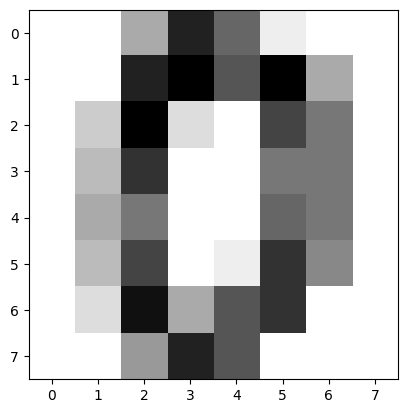

In [6]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits =datasets.load_digits()
plt.imshow(digits.images[0],cmap = plt.cm.gray_r,interpolation='nearest')

In [17]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

#이미지 평탄화

In [7]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples,-1))

data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

#훈련데이터와 테스트데이터 나누기

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(
data, digits.target, test_size=0.2)

#모델 훈련 및 학습

In [9]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,Y_train)
#DT
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
#LR
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
#RF
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

#결과 불러오기

In [10]:
from sklearn.metrics import accuracy_score
#KNN
Y_predict = knn.predict(X_test)
print("정확도:{}".format(accuracy_score(Y_test,Y_predict)))
#DT
Y_predict = dt.predict(X_test)
print("정확도:{}".format(accuracy_score(Y_test,Y_predict)))
#LR
Y_predict = lr.predict(X_test)
print("정확도:{}".format(accuracy_score(Y_test,Y_predict)))
#RF
Y_predict = rf.predict(X_test)
print("정확도:{}".format(accuracy_score(Y_test,Y_predict)))

정확도:0.9722222222222222
정확도:0.8416666666666667
정확도:0.9555555555555556
정확도:0.9694444444444444


#딥러닝하기

#X를 스케일링하기

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#one-hot encoding 하기

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# 클래스 개수 확인 (0부터 9까지 총 10개)
num_classes = 10

# Y_train과 Y_test를 원-핫 인코딩으로 변환
Y_train_onehot = to_categorical(Y_train, num_classes=num_classes)
Y_test_onehot = to_categorical(Y_test, num_classes=num_classes)

print(Y_train_onehot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


#모델 학습

In [20]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(Y_train_onehot.shape[1], activation="softmax")  # 10개의 클래스
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",   # 원-핫 인코딩 레이블에 적합
    metrics=["accuracy"]
)

# ⚠️ 학습에 사용할 레이블은 반드시 원-핫 인코딩된 Y_train_onehot입니다.
history = model.fit(
    X_train, Y_train_onehot,
    validation_split=0.2, # X_train의 20%를 검증(Validation) 데이터로 사용
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2211 - loss: 2.2081 - val_accuracy: 0.6562 - val_loss: 1.3850
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6746 - loss: 1.2141 - val_accuracy: 0.8090 - val_loss: 0.7297
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8402 - loss: 0.6637 - val_accuracy: 0.8958 - val_loss: 0.4271
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8686 - loss: 0.4791 - val_accuracy: 0.9410 - val_loss: 0.2881
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9089 - loss: 0.3216 - val_accuracy: 0.9479 - val_loss: 0.2307
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9312 - loss: 0.2562 - val_accuracy: 0.9583 - val_loss: 0.1821
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9385 - loss: 0.2056 - val_accuracy: 0.9583 - val_loss: 0.1644
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9392 - loss: 0.2066 - val_accuracy: 0.9618 - val_loss: 0.1577
Epo

#결과 확인

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


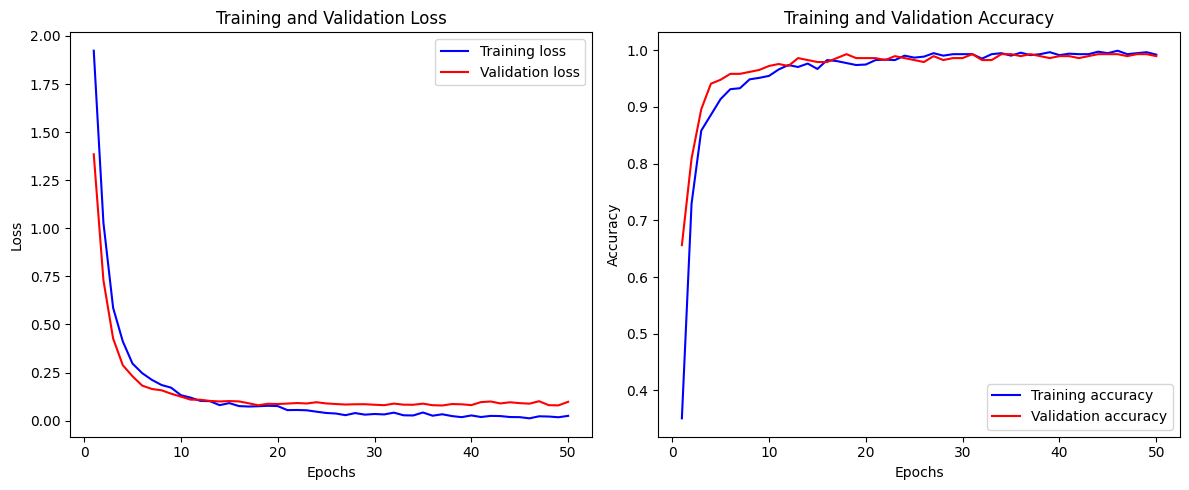


--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.90      1.00      0.95        26
           2       0.97      0.95      0.96        41
           3       0.97      0.97      0.97        35
           4       1.00      0.98      0.99        46
           5       0.95      1.00      0.98        42
           6       1.00      1.00      1.00        33
           7       0.97      0.97      0.97        35
           8       0.97      0.94      0.95        32
           9       1.00      0.94      0.97        31

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360


--- Confusion Matrix ---
[[39  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0]
 [ 0  2 39  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  1  0  0  0  0]
 [ 0  0  0  0 45  0  0  1  0  0]
 [ 0  0  0  0  0 42

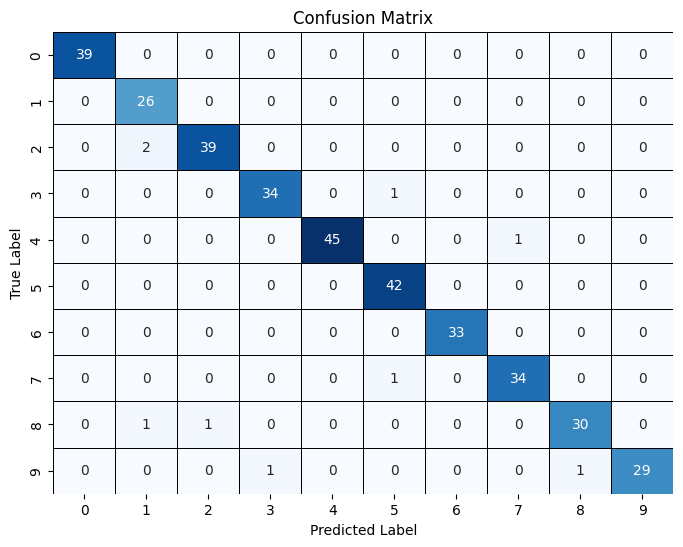

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# 1. 테스트 데이터 예측 (한 번만 수행)
y_pred = model.predict(X_test)

# 2. 클래스 레이블 변환 및 통일
# Y_test는 이미 정수 레이블이므로 argmax를 적용할 필요가 없습니다.
y_test_class = Y_test
# 예측 결과 (y_pred)를 정수형 레이블로 변환
y_pred_class = np.argmax(y_pred, axis=1)


## 3. 학습 과정 시각화 (Loss)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Training loss') # 'y' 대신 'b' (파란색)를 사용해 명확히 구분
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


## 4. 학습 과정 시각화 (Accuracy)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout() # 그래프가 겹치지 않도록 조정
plt.show()


## 5. 최종 성능 지표 출력
print("\n--- Classification Report ---")
print(classification_report(y_test_class, y_pred_class))

print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test_class, y_pred_class))

# (추가: 혼동 행렬 시각화)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_class, y_pred_class),
            annot=True, fmt='d', cmap='Blues',
            cbar=False, linewidths=0.5, linecolor='black')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()